## Tu primera red neuronal:

### 1. Importa las librerías necesarias:

In [44]:
import numpy as np                                                  #Librería de cálculo númerico para Python. Para instalar usar: `pip install numpy`
import pandas as pd                                                 #Para crear una tabla de datos. Para instalar Pandas usar 'pip install pandas'

import tensorflow as tf                                             #Para instalar Tensorlfow usar `pip install tensorflow`
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.datasets import load_breast_cancer                     #El conjunto de datos que vamos a usar. Para instalar Scikit-Learn usar `pip install scikit-learn`
from sklearn.model_selection import train_test_split                #Para dividir el conjunto de entrenamiento en train y test
import matplotlib.pyplot as plt


#### 1.1. Datos:


1.   "cancer_de_pecho" es un diccionario en donde "data" tiene asociado los valores de las variables predictoras y "target" es el valor a predecir (1 tiene cáncer y 0 no tiene cáncer).
2.   Asigna a la variable X el valor de las variables predictoras y a y el valor a predecir. 
2.   Si quieres consultar el significado de cada variable predictora, los nombres de las variables están asociadas al valor "feature_names" en el diccionario "cancer_de_pecho".
3.   Utiliza la función "train_test_split()" para dividir las muestras en training y test.



In [10]:
cancer_de_pecho = load_breast_cancer()

In [12]:
X = cancer_de_pecho.data
y = cancer_de_pecho.target

In [16]:
print("Nombres características:", cancer_de_pecho.feature_names)

Nombres características: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1.2. Define el modelo:


1.   Comprueba las dimensiones de entrada para crear la primera capa oculta
2.   Crea tres capas ocultas densas con 30, 20 y 10 neuronas respectivamente.
3.   La función de activación de todas las capas ocultas será de tipo "relu".
3.   La capa de salida tendrá sólo una neurona y su función de activación será la sigmoide.
4.   Cuando compiles el modelo utiliza la función de back-propagation (optimizer) de tipo "adam", la función de pérdida (loss) "binary_crossentropy" y la medida para analiar la evolución (metrics) que sea la "accuracy".
5.   Obtén un resumen (summary) del modelo creado.



In [23]:
input_dim = X_train.shape[1]
print(f"Número de características: {input_dim}")

Número de características: 30


In [25]:
modelo = Sequential([
    Dense(30, activation='relu', input_dim=input_dim),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
modelo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [29]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,771 (6.92 KB)

 Trainable params: 1,771 (6.92 KB)

 Non-trainable params: 0 (0.00 B)

#### 1.3. Train the model:

In [33]:
historico = modelo.fit(
    X_train, y_train,
    epochs=50,                
    batch_size=32,        
    validation_split=0.2,      # 20% de los datos de entrenamiento se usan para validación
    verbose=0
)

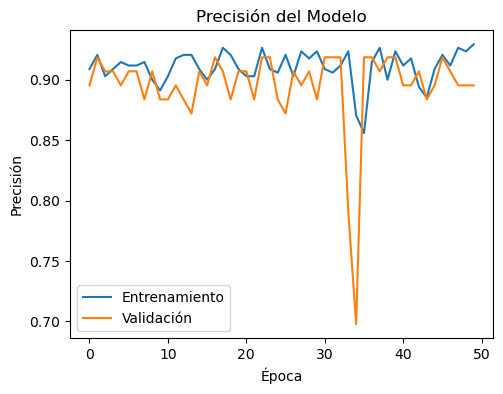

In [50]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'], label='Entrenamiento')
plt.plot(historico.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

#### 1.4. Predicting:

In [ ]:
#NO

#### 1.5. Evalutaion:

In [36]:
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'\nPrecisión en el conjunto de prueba: {accuracy:.4f}')
print(f'Pérdida en el conjunto de prueba: {loss:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.1003 

Precisión en el conjunto de prueba: 0.9650
Pérdida en el conjunto de prueba: 0.1083
